# Prueba Intertrimestral

**Nombre:**  
**Apellidos:**  

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [115]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    silhouette_score
)



# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [38]:
# Crear una función que calcule el índice de masa corporal (IMC) = peso (kg) / altura (m)^2

# Primero definimos las funciones necesarias
def imc(weight, height):
    return weight / (height ** 2)

imc(80,1.82)

24.151672503320853

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [43]:
def saludable(imcValue):
    if imcValue < 18.5:
        return "Bajo peso"
    elif 18.5 <= imcValue < 25:
        return "Normal"
    else: 
        return "Sobrepeso"

saludable(30)


'Sobrepeso'

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [45]:
# Generamos datos aleatorios
np.random.seed(42)  # Para reproducibilidad
peso = np.random.uniform(50, 100, 10)  # Pesos entre 50 y 100 kg
altura = np.random.uniform(1.50, 1.90, 10)  # Alturas entre 1.50 y 1.90 m

# Creamos el DataFrame
imcData = pd.DataFrame({
    'peso': peso,
    'altura': altura,
    'imc': [imc(p, a) for p, a in zip(peso, altura)],
    'categoria': [saludable(imc(p, a)) for p, a in zip(peso, altura)]
})

# Mostramos las primeras filas
imcData.head(5)

# Verificamos los tipos de datos
print("Tipos de datos:")
print(imcData.dtypes)

# Información adicional del DataFrame
print("Información del DataFrame:")
print(imcData.info())









Tipos de datos:
peso         float64
altura       float64
imc          float64
categoria     object
dtype: object
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   peso       10 non-null     float64
 1   altura     10 non-null     float64
 2   imc        10 non-null     float64
 3   categoria  10 non-null     object 
dtypes: float64(3), object(1)
memory usage: 452.0+ bytes
None


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [47]:


class HealthTools:
    
    def __init__(self):
        pass
    
    def imc(self, weight, height):
        return weight / (height ** 2)
    
    def saludable(self, imcValue):
        if imcValue < 18.5:
            return "Bajo peso"
        elif 18.5 <= imcValue < 25:
            return "Normal"
        elif 25 <= imcValue < 30:
            return "Sobrepeso"
        else:
            return "Obesidad"
    
    def procesar_datos(self, pesos, alturas):
        # Calculamos el IMC para cada par peso-altura
        imcs = [self.imc(p, a) for p, a in zip(pesos, alturas)]
        
        # Clasificamos cada IMC
        categorias = [self.saludable(imc_val) for imc_val in imcs]
        
        # Creamos el DataFrame
        df = pd.DataFrame({
            'peso': pesos,
            'altura': alturas,
            'imc': imcs,
            'categoria': categorias
        })
        
        return df


# Ejemplo de uso
if __name__ == "__main__":
    # Creamos una instancia de la clase
    health = HealthTools()
    
    # Generamos datos de ejemplo
    np.random.seed(42)
    pesos = np.random.uniform(50, 100, 10)
    alturas = np.random.uniform(1.50, 1.90, 10)
    
    # Procesamos los datos
    imcData = health.procesar_datos(pesos, alturas)
    
    print("DataFrame generado con HealthTools:")
    print(imcData)
    print("\n" + "="*60 + "\n")
    
    # Ejemplo de uso individual
    print("Ejemplo de cálculo individual:")
    peso_ejemplo = 70
    altura_ejemplo = 1.75
    imc_ejemplo = health.imc(peso_ejemplo, altura_ejemplo)
    categoria_ejemplo = health.saludable(imc_ejemplo)
    
    print(f"Peso: {peso_ejemplo} kg")
    print(f"Altura: {altura_ejemplo} m")
    print(f"IMC: {imc_ejemplo:.2f}")
    print(f"Categoría: {categoria_ejemplo}")
    

DataFrame generado con HealthTools:
        peso    altura        imc  categoria
0  68.727006  1.508234  30.212738   Obesidad
1  97.535715  1.887964  27.363792  Sobrepeso
2  86.599697  1.832977  25.775216  Sobrepeso
3  79.932924  1.584936  31.820166   Obesidad
4  57.800932  1.572730  23.368267     Normal
5  57.799726  1.573362  23.349016     Normal
6  52.904181  1.621697  20.116417     Normal
7  93.308807  1.709903  31.913902   Obesidad
8  80.055751  1.672778  28.609872  Sobrepeso
9  85.403629  1.616492  32.683563   Obesidad


Ejemplo de cálculo individual:
Peso: 70 kg
Altura: 1.75 m
IMC: 22.86
Categoría: Normal


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [49]:
# Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.
def load_and_display_data(file_path):
    # Cargar el dataset
    lifeStyleData = pd.read_csv(file_path)
    
    # Mostrar las 5 primeras filas
    print("Primeras 5 filas del dataset:")
    print(lifeStyleData.head(5))
    
    # Mostrar el número de filas y columnas
    print("\nNúmero de filas y columnas:")
    print(lifeStyleData.shape)
    
    return lifeStyleData

lifeStyleData = load_and_display_data('Final_data.csv')


Primeras 5 filas del dataset:
     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789 

b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [68]:
def describeData(dataFrame):

    # Creamos un diccionario para almacenar la información
    info = {
        'columna': [],
        'tipo_dato': [],
        'valores_nulos': [],
        'porcentaje_nulos': []
    }
    
    # Recorremos cada columna del DataFrame
    for columna in dataFrame.columns:
        info['columna'].append(columna)
        info['tipo_dato'].append(str(dataFrame[columna].dtype))
        
        # Calculamos valores nulos
        nulos = dataFrame[columna].isnull().sum()
        info['valores_nulos'].append(nulos)
        
        # Calculamos porcentaje de nulos
        total_registros = len(dataFrame)
        porcentaje = (nulos / total_registros) * 100 if total_registros > 0 else 0
        info['porcentaje_nulos'].append(round(porcentaje, 2))
    
    # Convertimos a DataFrame
    resultado = pd.DataFrame(info)
    
    return resultado

resultado = describeData(lifeStyleData)
print(resultado)


                           columna tipo_dato  valores_nulos  porcentaje_nulos
0                              Age   float64              0               0.0
1                           Gender    object              0               0.0
2                      Weight (kg)   float64              0               0.0
3                       Height (m)   float64              0               0.0
4                          Max_BPM   float64              1               0.0
5                          Avg_BPM   float64              1               0.0
6                      Resting_BPM   float64              0               0.0
7         Session_Duration (hours)   float64              0               0.0
8                  Calories_Burned   float64              0               0.0
9                     Workout_Type    object              0               0.0
10                  Fat_Percentage   float64              0               0.0
11           Water_Intake (liters)   float64              0     

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [69]:
variables_con_nulos = []

for index, row in resultado.iterrows():
    if row['valores_nulos'] != 0:
        variables_con_nulos.append(row['columna'])

print(f"Las variables con valores nulos son: {variables_con_nulos}")

Las variables con valores nulos son: ['Max_BPM', 'Avg_BPM', 'cholesterol_mg']


d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

                     Age  Fat_Percentage       BMI  Calories
Age             1.000000       -0.025056 -0.016940 -0.041096
Fat_Percentage -0.025056        1.000000  0.902341  0.759601
BMI            -0.016940        0.902341  1.000000  0.837555
Calories       -0.041096        0.759601  0.837555  1.000000


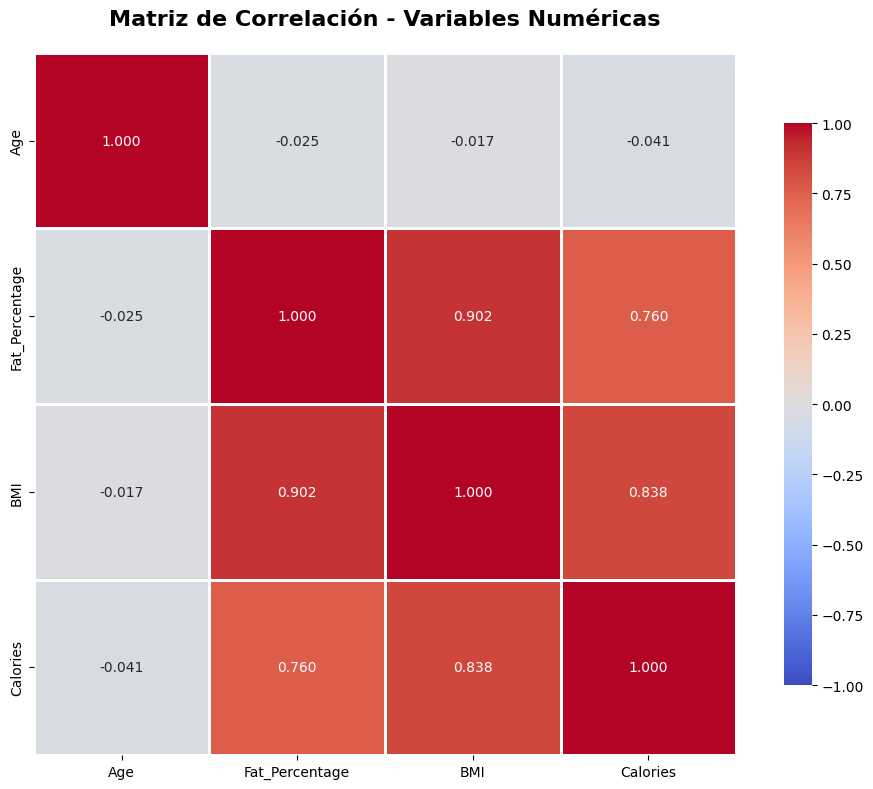

ANALISIS DE LA CORRELACION:
Fuerte Correlación entre Fat % y BMI
Fuerte Correlación entre Fat % y Calories


In [ ]:


#datos_numericos = lifeStyleData.select_dtypes(include=[np.float64]) nos sirve para ver correlaciones fuertes y escoger unas de prueba para que sea más visible
columnas_deseadas = ['Age', 'Fat_Percentage', 'BMI','Calories']
df_filtrado = lifeStyleData[columnas_deseadas]

# Calculamos la matriz de correlación
correlacion = df_filtrado.corr()

print(correlacion)

# Creamos el gráfico de correlaciones
plt.figure(figsize=(10, 8))

# Heatmap con seaborn
sns.heatmap(correlacion, 
            annot=True,           # Muestra los valores
            cmap='coolwarm',      # Paleta de colores
            center=0,             # Centra la escala en 0
            square=True,          # Celdas cuadradas
            linewidths=1,         # Líneas entre celdas
            cbar_kws={"shrink": 0.8},  # Barra de color
            fmt='.3f',            # Formato de números
            vmin=-1, vmax=1)      # Rango de -1 a 1

plt.title('Matriz de Correlación - Variables Numéricas', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("ANALISIS DE LA CORRELACION:")
print("Fuerte Correlación entre Fat % y BMI")
print("Fuerte Correlación entre Fat % y Calories")

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [85]:
lifeStyleData.head()
new_data = {
    'age': lifeStyleData['Age'],
    'height':lifeStyleData['Height (m)'],
    'weight':lifeStyleData['Weight (kg)'],
    'targetVar':lifeStyleData['BMI']
}
new_df = pd.DataFrame(data=new_data, columns=['age','height','weight','targetVar'])
new_df.head()

,age,height,weight,targetVar
0,34.91,1.62,65.27,24.87
1,23.37,1.55,56.41,23.48
2,33.20,1.67,58.98,21.15
3,38.69,1.70,93.78,32.45
4,45.09,1.88,52.42,14.83


b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [87]:
def evaluar_linear_regression(df, target_col='targetVar'):
    """
    Entrena y evalúa un modelo de Regresión Lineal.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame con todas las features y la columna target
    target_col : str
        Nombre de la columna target (por defecto 'target')
    
    Retorna:
    --------
    dict : Diccionario con el modelo entrenado y métricas de evaluación
    """
    print("="*60)
    print("📊 REGRESIÓN LINEAL")
    print("="*60)
    
    # Separar features y target
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # Entrenar modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Predecir
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Mostrar resultados
    print(f"✓ Modelo entrenado con {X_train.shape[0]} muestras")
    print(f"\nMétricas en test ({X_test.shape[0]} muestras):")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE:      {mae:.4f}")
    print(f"  RMSE:     {rmse:.4f}")
    print(f"\nCoeficientes más importantes:")
    coefs = pd.DataFrame({
        'Variable': X.columns,
        'Coeficiente': modelo.coef_
    }).sort_values('Coeficiente', key=abs, ascending=False)
    print(coefs.head())
    
    return {
        'modelo': modelo,
        'r2': r2,
        'mae': mae,
        'rmse': rmse,
        'coeficientes': coefs
    }

resultado = evaluar_linear_regression(new_df)

📊 REGRESIÓN LINEAL
✓ Modelo entrenado con 14000 muestras

Métricas en test (6000 muestras):
  R² Score: 0.9847
  MAE:      0.5728
  RMSE:     0.8372

Coeficientes más importantes:
  Variable  Coeficiente
1   height   -28.202921
2   weight     0.330767
0      age     0.005276


c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [92]:
r2 = resultado.get('r2')
print(f"El valor del R2 es de {round(r2,2)}")
mse = resultado['rmse']
print(f"El resultado de MSE es de {round(mse, 2)}")

El valor del R2 es de 0.98
El resultado de MSE es de 0.84


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [116]:
def evaluar_random_forest_regressor(df, target_col='targetVar', n_estimators=100):
    """
    Entrena y evalúa un modelo Random Forest para regresión.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame con todas las features y la columna target
    target_col : str
        Nombre de la columna target
    n_estimators : int
        Número de árboles (por defecto 100)
    
    Retorna:
    --------
    dict : Diccionario con el modelo entrenado y métricas
    """
    print("="*60)
    print("RANDOM FOREST REGRESSOR")
    print("="*60)
    
    # Separar features y target
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # Entrenar modelo
    modelo = RandomForestRegressor(
        n_estimators=n_estimators, 
        random_state=42, 
        n_jobs=-1
    )
    modelo.fit(X_train, y_train)
    
    # Predecir
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Importancia de variables
    importancia = pd.DataFrame({
        'Variable': X.columns,
        'Importancia': modelo.feature_importances_
    }).sort_values('Importancia', ascending=False)
    
    # Mostrar resultados
    print(f"✓ Modelo entrenado con {n_estimators} árboles")
    print(f"\nMétricas en test:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE:      {mae:.4f}")
    print(f"  RMSE:     {rmse:.4f}")
    print(f"\nVariables más importantes:")
    print(importancia.head())
    
    return {
        'modelo': modelo,
        'r2': r2,
        'mae': mae,
        'rmse': rmse,
        'importancia': importancia
    }

resultados_rf = evaluar_random_forest_regressor(new_df)
print(resultados_rf)

RANDOM FOREST REGRESSOR
✓ Modelo entrenado con 100 árboles

Métricas en test:
  R² Score: 0.9999
  MAE:      0.0362
  RMSE:     0.0798

Variables más importantes:
   Variable  Importancia
2    weight     0.721020
1    height     0.177519
3  bmi_bool     0.100594
0       age     0.000867
{'modelo': RandomForestRegressor(n_jobs=-1, random_state=42), 'r2': 0.9998606337396808, 'mae': 0.03618784999999986, 'rmse': np.float64(0.0798286284382575), 'importancia':    Variable  Importancia
2    weight     0.721020
1    height     0.177519
3  bmi_bool     0.100594
0       age     0.000867}


In [117]:
print("="*60)
print("COMPARATIVA DE MODELOS")
print("="*60)

print("1. R2\n")
print(f"R2(Linear Regression) = {round(r2,3)} vs R2(Random Forest) = {round(resultados_rf.get('r2'),3)}\n Winner: Random Forest")
print("2. MSE\n")
print(f"MSE(Linear Regression) = {round(mse,3)} vs MSE(Random Forest) = {round(resultados_rf.get('rmse'),3)}\n Winner: Random Forest\n")
print("FINAL WINNER: RANDOM FOREST")


COMPARATIVA DE MODELOS
1. R2

R2(Linear Regression) = 0.985 vs R2(Random Forest) = 1.0
 Winner: Random Forest
2. MSE

MSE(Linear Regression) = 0.837 vs MSE(Random Forest) = 0.08
 Winner: Random Forest

FINAL WINNER: RANDOM FOREST


## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [ ]:
# Refactorizar para caso de uso específico 
def saludable_bool(imcValue):
    if imcValue < 18.5:
        a = 0
    elif 18.5 <= imcValue < 25:
        a = 1
    else: 
        a = 0
    return a

# Definir lista vacía 
values = []

# Recorrer row targetVar
for index, row in new_df.iterrows():
    a = saludable_bool(row['targetVar'])
    values.append(a)

# Guardar variable nueva
new_df["bmi_bool"]=values
new_df.head()


,age,height,weight,targetVar,bmi_bool
0,34.91,1.62,65.27,24.87,1
1,23.37,1.55,56.41,23.48,1
2,33.20,1.67,58.98,21.15,1
3,38.69,1.70,93.78,32.45,0
4,45.09,1.88,52.42,14.83,0


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [ ]:

def evaluar_logistic_regression(df, target_col='bmi_bool', max_iter=1000):
    """
    Entrena y evalúa un modelo Linear SVM para clasificación.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame con todas las features y la columna target
    target_col : str
        Nombre de la columna target
    max_iter : int
        Número máximo de iteraciones
    
    Retorna:
    --------
    dict : Diccionario con el modelo entrenado y métricas
    """
    print("="*60)
    print("🎯 LINEAR SVM (Clasificación)")
    print("="*60)
    
    # Separar features y target
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Escalar datos (importante para SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entrenar modelo
    modelo = LogisticRegression(max_iter=max_iter, random_state=42)
    modelo.fit(X_train_scaled, y_train)
    
    # Predecir
    y_pred = modelo.predict(X_test_scaled)
    
    # Calcular métricas
    accuracy = modelo.score(X_test_scaled, y_test)
    
    # Mostrar resultados
    print(f"✓ Modelo entrenado")
    print(f"\nAccuracy en test: {accuracy:.4f}")
    print(f"\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))
    print(f"\nMatriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    
    return {
        'y_pred': y_pred, 
        'y_test': y_test,
        'modelo': modelo,
        'scaler': scaler,
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

result = evaluar_logistic_regression(new_df)


🎯 LINEAR SVM (Clasificación)
✓ Modelo entrenado

Accuracy en test: 0.5960

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      2459
           1       0.46      0.29      0.35      1541

    accuracy                           0.60      4000
   macro avg       0.55      0.54      0.53      4000
weighted avg       0.57      0.60      0.57      4000


Matriz de confusión:
[[1940  519]
 [1097  444]]


c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


Accuracy del modelo: 0.596
✓ Visualización guardada como 'viz_modelo.png'


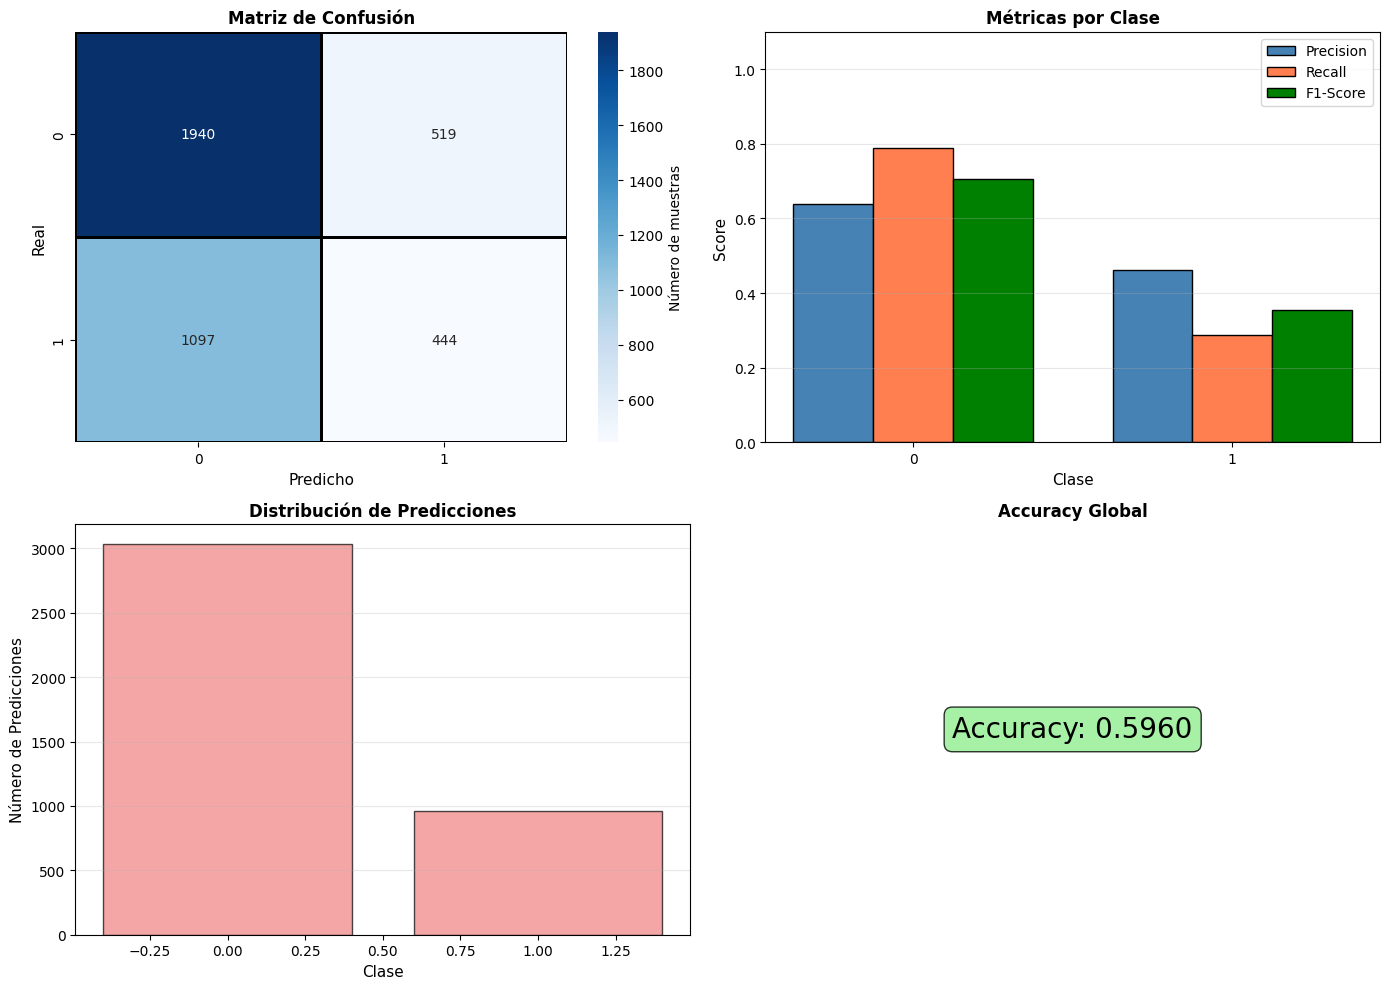

In [129]:
print(f"Accuracy del modelo: {result.get('accuracy')}")

def visualizar_clasificacion(resultado, y_test, y_pred, nombre_modelo="Modelo"):
    """
    Crea visualizaciones para modelos de clasificación.
    
    Parámetros:
    -----------
    resultado : dict
        Diccionario retornado por las funciones de evaluación
    y_test : array
        Etiquetas reales de test
    y_pred : array
        Etiquetas predichas
    nombre_modelo : str
        Nombre del modelo
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], 
                cbar_kws={'label': 'Número de muestras'}, linewidths=1, linecolor='black')
    axes[0, 0].set_xlabel('Predicho', fontsize=11)
    axes[0, 0].set_ylabel('Real', fontsize=11)
    axes[0, 0].set_title('Matriz de Confusión', fontweight='bold')
    
    # 2. Métricas por Clase
    report_dict = resultado['classification_report']
    clases = [k for k in report_dict.keys() if k not in ['accuracy', 'macro avg', 'weighted avg']]
    
    if clases:
        precision = [report_dict[c]['precision'] for c in clases]
        recall = [report_dict[c]['recall'] for c in clases]
        f1 = [report_dict[c]['f1-score'] for c in clases]
        
        x = np.arange(len(clases))
        width = 0.25
        
        axes[0, 1].bar(x - width, precision, width, label='Precision', color='steelblue', edgecolor='black')
        axes[0, 1].bar(x, recall, width, label='Recall', color='coral', edgecolor='black')
        axes[0, 1].bar(x + width, f1, width, label='F1-Score', color='green', edgecolor='black')
        
        axes[0, 1].set_xlabel('Clase', fontsize=11)
        axes[0, 1].set_ylabel('Score', fontsize=11)
        axes[0, 1].set_title('Métricas por Clase', fontweight='bold')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(clases)
        axes[0, 1].legend()
        axes[0, 1].set_ylim([0, 1.1])
        axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # 3. Distribución de Predicciones
    unique_pred, counts_pred = np.unique(y_pred, return_counts=True)
    axes[1, 0].bar(unique_pred, counts_pred, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Clase', fontsize=11)
    axes[1, 0].set_ylabel('Número de Predicciones', fontsize=11)
    axes[1, 0].set_title('Distribución de Predicciones', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Accuracy Global
    accuracy_texto = f"Accuracy: {resultado['accuracy']:.4f}"
    axes[1, 1].text(0.5, 0.5, accuracy_texto, 
                    ha='center', va='center', fontsize=20, 
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Accuracy Global', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'viz_{nombre_modelo.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    print(f"✓ Visualización guardada como 'viz_{nombre_modelo.lower().replace(' ', '_')}.png'")
    plt.show()


visualizar_clasificacion(result, result.get('y_test'), result['y_pred'])

d) (0.75 pts) Explica qué variable parece influir más según el modelo.

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



Las variables que mas parecen influir son: la edad, el peso, el bmi y las variables relacionadas con las calorías. 
El random forest es el que mejor resultado mostrón. 
Ajustaría mejor el modelo y probaría más variables. 